___
___



# Taha Junaid

# taha.junaid3000@gmail.com 





 
---
## Preprocessing
---



In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

os.chdir('C:\\Users\\Taha\\Desktop\\')

In [2]:
# read the train data
data=pd.read_excel('Data.xlsx',sheet_name='Train_Data')
display(data)

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
1,AB de Villiers,12,11,2,480,90*,53.33,275,174.54,0,6,39,30,424
2,Abhishek Sharma,3,3,2,63,46*,63,33,190.90,0,0,3,5,63
3,Ajinkya Rahane,15,14,1,370,65*,28.46,313,118.21,0,1,39,5,396
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Virat Kohli,14,14,3,530,92*,48.18,381,139.10,0,4,52,18,488
96,Washington Sundar,7,6,3,65,35,21.66,38,171.05,0,0,5,4,64
97,Wriddhiman Saha,11,10,2,122,35,15.25,102,119.60,0,0,17,1,115
98,Yusuf Pathan,15,13,4,260,45*,28.88,200,130.00,0,0,22,11,296


In [3]:
print(data.dtypes)
display(data.describe(include='all'))


PLAYER        object
Mat            int64
Inns           int64
NO             int64
2018_Runs      int64
HS            object
Avg           object
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
2019_Runs      int64
dtype: object


,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
count,100,100.000000,100.000000,100.000000,100.000000,100.0,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
unique,100,NaN,NaN,NaN,NaN,76.0,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Manish Pandey,NaN,NaN,NaN,NaN,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,5.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.420000,8.600000,1.790000,189.260000,NaN,NaN,135.890000,133.162000,0.050000,1.010000,16.390000,8.680000,184.2600
std,NaN,4.472542,4.572646,1.683521,182.454235,NaN,NaN,123.063414,33.044126,0.261116,1.642215,17.852875,9.382856,173.3093
min,NaN,1.000000,1.000000,0.000000,13.000000,NaN,NaN,5.000000,71.420000,0.000000,0.000000,0.000000,0.000000,9.0000
25%,NaN,6.000000,4.000000,1.000000,50.000000,NaN,NaN,38.750000,115.860000,0.000000,0.000000,3.000000,1.000000,36.2500
50%,NaN,11.000000,8.000000,1.000000,120.000000,NaN,NaN,88.000000,132.790000,0.000000,0.000000,8.000000,5.000000,108.0000
75%,NaN,14.000000,13.000000,3.000000,284.500000,NaN,NaN,197.750000,149.525000,0.000000,1.000000,23.250000,11.250000,334.5000


In [4]:
df=data.copy()

In [5]:
#3 rows had avg '-' ,removed them and converted to float

for i in range(0,df.shape[0]):
    if(type(df['Avg'][i])==str):
        print(i,df['PLAYER'][i])
        df=df.drop(i,axis=0)

df.reset_index(inplace=True,drop=True)
df['Avg']=df['Avg'].astype(float)


44 Kedar Jadhav
57 Mitchell Johnson
81 Shardul Thakur


* ### A star at the end of Highest Score (HS) means the player wasn't out even at that High Score
* ### So, a new column is created ONO which stands for 'Out or Not Out',with 1 if the player was 'NOTOut' at his HighScore or 0 if the player was 'Out' at his HighScore

In [6]:
df['ONO']=df['HS'].str[-1].copy()
df['HS']=df['HS'].astype(str)
for i in range(0,df.shape[0]):
    if df['HS'][i][-1]=='*':
        df['HS'][i]=df['HS'][i][0:-1]

df['HS']=df['HS'].astype(int)

In [7]:
df['ONO']=df['ONO'].map({'*':1,np.nan:0})
df

,PLAYER,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs,ONO
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,6,39,30,424,1
2,Abhishek Sharma,3,3,2,63,46,63.00,33,190.90,0,0,3,5,63,1
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,1,39,5,396,1
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Virat Kohli,14,14,3,530,92,48.18,381,139.10,0,4,52,18,488,1
93,Washington Sundar,7,6,3,65,35,21.66,38,171.05,0,0,5,4,64,0
94,Wriddhiman Saha,11,10,2,122,35,15.25,102,119.60,0,0,17,1,115,0
95,Yusuf Pathan,15,13,4,260,45,28.88,200,130.00,0,0,22,11,296,1


In [8]:
#make sure all columns are numeric
df.drop(['PLAYER'],axis=1,inplace=True)
df.columns = df.columns.map(str)
display(df.dtypes)

Mat            int64
Inns           int64
NO             int64
2018_Runs      int64
HS             int32
Avg          float64
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
2019_Runs      int64
ONO            int64
dtype: object

In [9]:
## checking for outliers
#Q1 is First Quartile,Q3 is Third Quartile
#IQR stands for Inter Quartile Range (Q3-Q1)
#Low Outliers lie below Q1-1.5*IQR
#High Outliers lie above Q3+1.5*IQR

desc=df.describe(include='all')

odf=pd.DataFrame(columns = ['column','IQR','Low Outlier Limit','min in data','max in data','High Outlier Limit'])

for col in df.columns:
    Q1=desc[col]['25%']
    Q3=desc[col]['75%']
    IQR=Q3-Q1
    lol=Q1-1.5*IQR
    hol=Q3+1.5*IQR
    odf.loc[odf.shape[0]]=[col,IQR,lol,desc[col]['min'],desc[col]['max'],hol]

print("Check if Low Outlier Limit < min in data < max in data < High Outlier Limit")
display(odf)
display(desc)


Check if Low Outlier Limit < min in data < max in data < High Outlier Limit


,column,IQR,Low Outlier Limit,min in data,max in data,High Outlier Limit
0,Mat,8.00,-6.000,2.00,17.00,26.000
1,Inns,9.00,-9.500,2.00,17.00,26.500
2,NO,2.00,-2.000,0.00,9.00,6.000
3,2018_Runs,234.00,-299.000,13.00,735.00,637.000
4,HS,38.00,-30.000,7.00,128.00,122.000
5,Avg,18.65,-14.225,3.00,75.83,60.375
6,BF,160.00,-200.000,12.00,516.00,440.000
7,SR,33.51,65.675,71.42,196.87,199.715
8,100,0.00,0.000,0.00,2.00,0.000
9,50,1.00,-1.500,0.00,8.00,2.500


,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs,ONO
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,10.536082,8.824742,1.804124,194.546392,48.350515,25.126289,139.701031,131.563505,0.051546,1.041237,16.835052,8.927835,189.587629,0.371134
std,4.406581,4.455826,1.705623,182.724122,27.877351,14.870974,122.992476,28.738455,0.265013,1.657794,17.944173,9.417678,173.258823,0.485618
min,2.000000,2.000000,0.000000,13.000000,7.000000,3.000000,12.000000,71.420000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,6.000000,4.000000,1.000000,52.000000,27.000000,13.750000,40.000000,115.940000,0.000000,0.000000,3.000000,1.000000,40.000000,0.000000
50%,11.000000,8.000000,1.000000,122.000000,45.000000,22.800000,91.000000,132.580000,0.000000,0.000000,9.000000,6.000000,115.000000,0.000000
75%,14.000000,13.000000,3.000000,286.000000,65.000000,32.400000,200.000000,149.450000,0.000000,1.000000,24.000000,12.000000,342.000000,1.000000
max,17.000000,17.000000,9.000000,735.000000,128.000000,75.830000,516.000000,196.870000,2.000000,8.000000,68.000000,37.000000,692.000000,1.000000


* Above, we see that  main determining columns 'Mat','Inns','2018_Runs','HS','Avg','BF','SR','2019_Runs','ONO' have no or negligible outliers

* Where as the remaining columns('NO','100','50','4s','6s') will be checked for their significance in the model.Insignificant features will be dropped

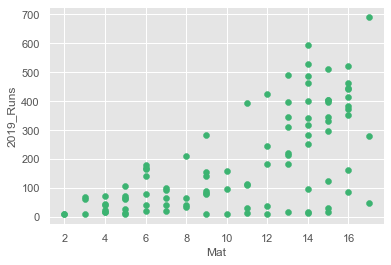

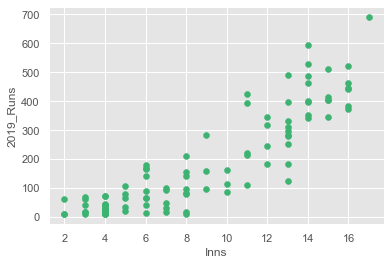

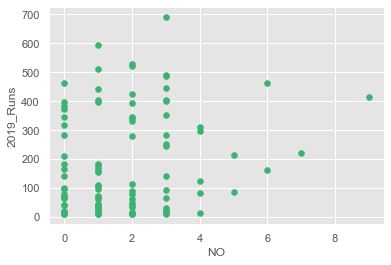

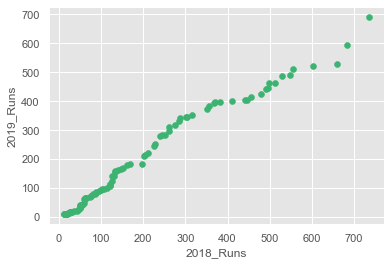

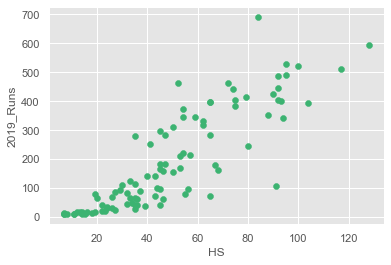

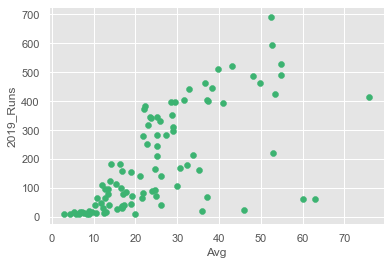

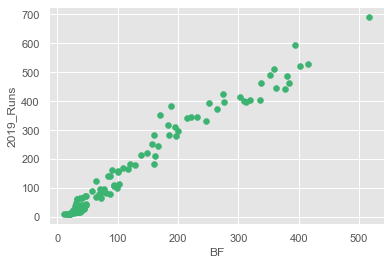

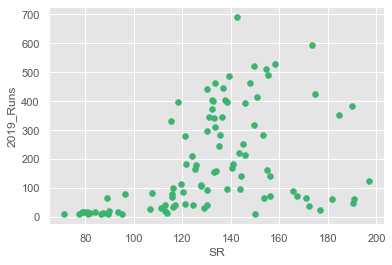

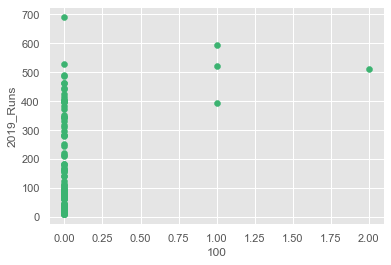

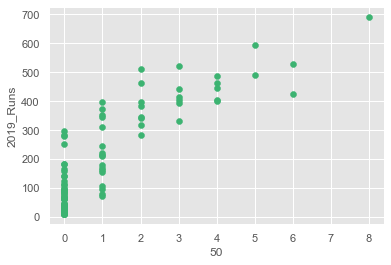

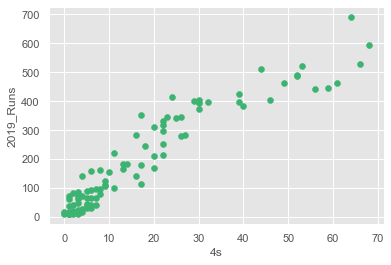

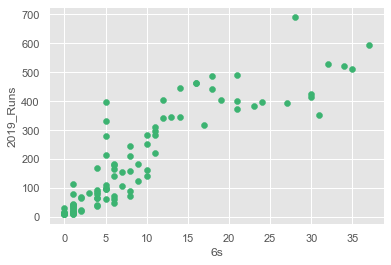

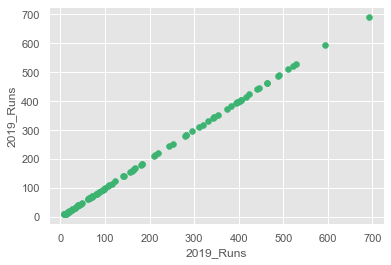

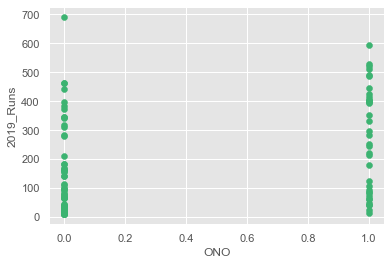

In [10]:
#checking linearity
for col in df.columns:
    plt.scatter(df[col],df['2019_Runs'],color='mediumseagreen')
    plt.xlabel(col)
    plt.ylabel('2019_Runs')
    plt.show()

    

In [11]:
#check for columns not containing 0 values so that logarithmic transformation can be aaplied 
print(df.columns)
dets=pd.DataFrame()
dets['col']=df.columns
dets['Non zero']=97-np.count_nonzero(df,axis=0)
dets

Index(['Mat', 'Inns', 'NO', '2018_Runs', 'HS', 'Avg', 'BF', 'SR', '100', '50',
       '4s', '6s', '2019_Runs', 'ONO'],
      dtype='object')


,col,Non zero
0,Mat,0
1,Inns,0
2,NO,24
3,2018_Runs,0
4,HS,0
5,Avg,0
6,BF,0
7,SR,0
8,100,93
9,50,56


In [12]:
#therefore the columns to be transformed are:
trans_cols=['Mat', 'Inns', '2018_Runs', 'HS', 'Avg' ,'BF', 'SR', '2019_Runs']

* In the trans_cols we can observe hetroscedasticity and hence applying log transformation  to such columns is necessary to get linear data


* More columns such as '6s','4s' and '50' having the slightest non linearities can be transformed by logarithmic transformations but those columns contain 0 values which will become Infinite after the transforamtion and cannot be put into the regression model.


* Moreover you might think that the rows with Infinite values can be removed.But in this dataset we do not have much rows and our model might undertrain if we loose records.


* Hence it is optimal to have very slight non linearities in such columns.



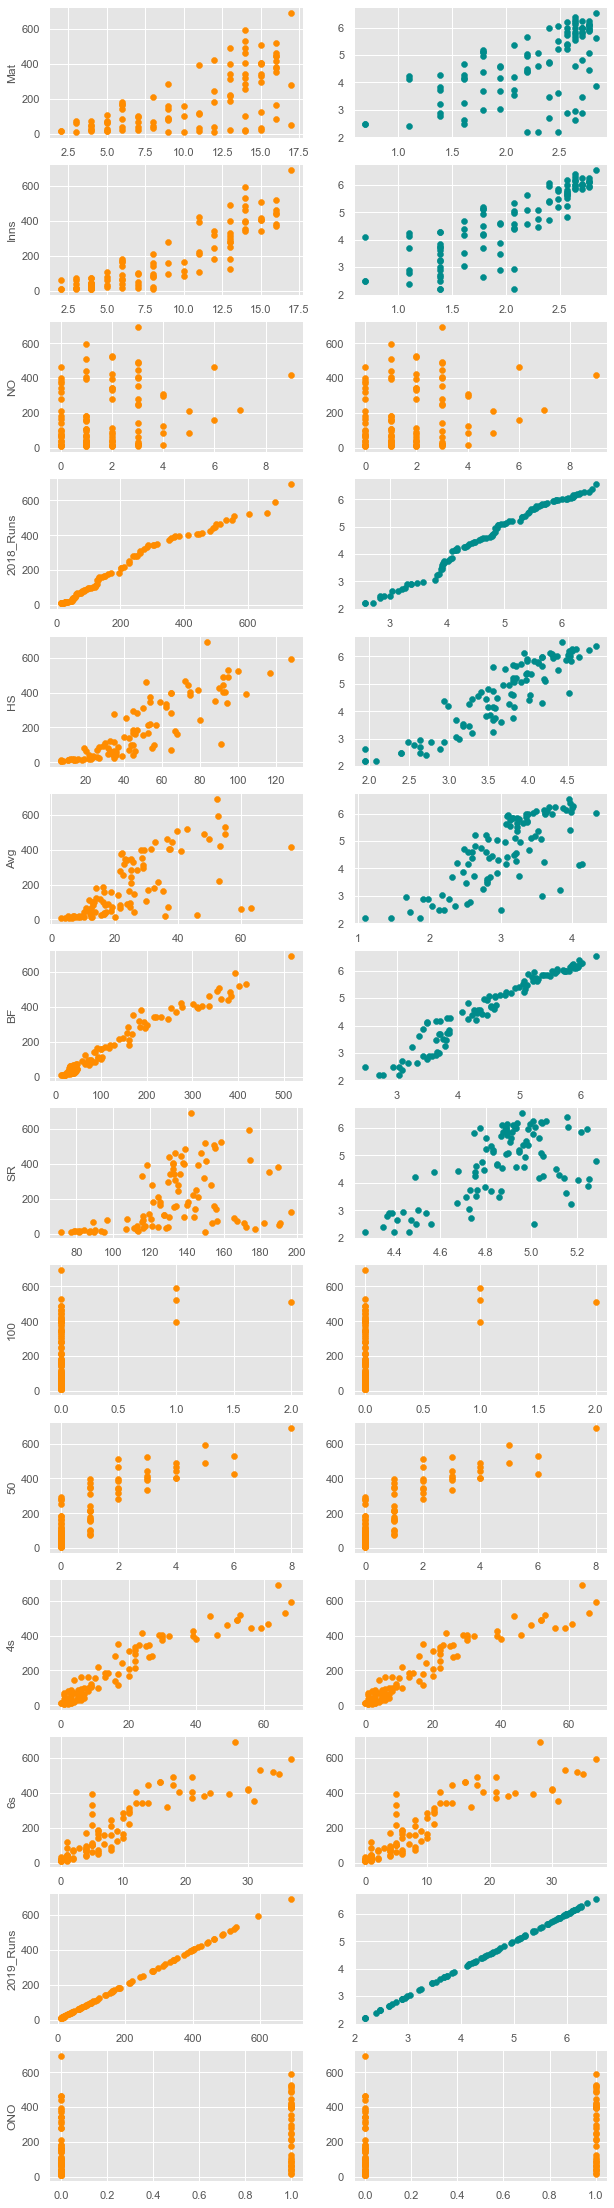

In [13]:
#Visualization of Before and After Logarithmic Transformation of possible and necessary columns

fig, axs = plt.subplots(df.shape[1], 2,figsize=(10,40))
for col,i in zip(df.columns,range(0,df.shape[1])):
    axs[i, 0].scatter((df[col]),(df['2019_Runs']),color='darkorange')
    if(col in trans_cols):
        axs[i, 1].scatter(np.log(df[col]),np.log(df['2019_Runs']),color='darkcyan')
    else:
        axs[i, 1].scatter((df[col]),(df['2019_Runs']),color='darkorange')
    axs[i, 0].set_ylabel(col)
    


#BlUE GRAPH : LOG TRANSFORMATION APPLIED
#ORANGE GRAPH : NO TRANSFORMATION APPLIED

In [14]:
#logarithmic transformation

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in [c for c in trans_cols if df[c].dtype in numerics]:
    df[c] = np.log(df[c])


Index(['Mat', 'Inns', 'NO', '2018_Runs', 'HS', 'Avg', 'BF', 'SR', '100', '50',
       '4s', '6s', '2019_Runs', 'ONO'],
      dtype='object')


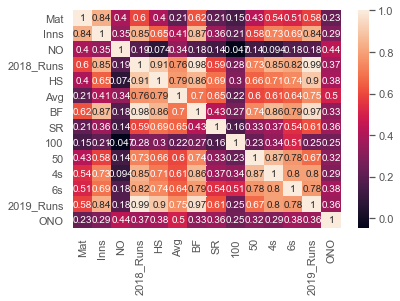

In [15]:
#multicolinearity check
print(df.columns)
corrmatrix=df.corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [16]:
#Calculate Variance Inflation Factor to check Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,78.468523,Mat
1,412.062969,Inns
2,8.799372,NO
3,7960.854949,2018_Runs
4,358.399380,HS
5,364.127410,Avg
6,1104.372627,BF
7,250.377896,SR
8,2.102121,100
9,9.357812,50


* Only columns drastically affecting the model should be dropped so that we dont loose the features which provide variability to our model.
* Hence, such columns are removed later

***
## The MultiLinear Regression Model
***

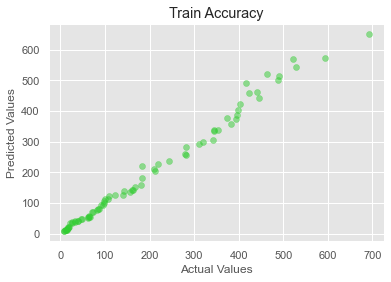

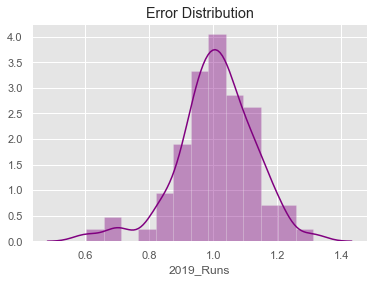

Intercept :  4.650603890979927
R Squared :  0.9892038207517044
Adjusted R squared :  0.9873767750327621


,Features,Weights,p values
0,Mat,-0.012014,0.000
1,Inns,-0.005563,0.000
2,2018_Runs,1.456242,0.000
3,HS,-0.021935,0.000
4,Avg,-0.014145,0.000
5,SR,0.023632,0.000
6,100,0.008831,0.030
7,50,-0.023859,0.000
8,4s,-0.150155,0.000
9,6s,-0.050493,0.000


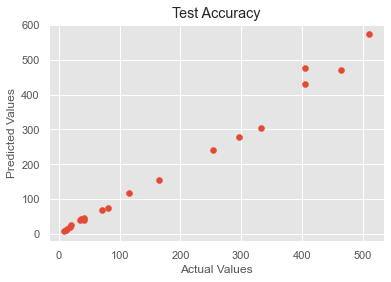

,Prediction,Actual Values,Difference,Difference%
0,431.507106,405.0,26.507106,6.544964
1,14.375592,14.0,0.375592,2.682798
2,19.007422,18.0,1.007422,5.596787
3,574.814550,510.0,64.814550,12.708735
4,75.649147,80.0,-4.350853,5.438566
5,239.546710,253.0,-13.453290,5.317506
6,11.346833,12.0,-0.653167,5.443056
7,39.520249,42.0,-2.479751,5.904169
8,278.453933,296.0,-17.546067,5.927725
9,304.057610,332.0,-27.942390,8.416382


,Prediction,Actual Values,Difference,Difference%
count,20.000000,20.000000,20.000000,20.000000
mean,171.697006,166.200000,5.497006,9.168730
std,186.231340,173.498855,24.116321,6.776851
min,7.016215,9.000000,-27.942390,1.255443
25%,35.942794,30.500000,-3.781726,5.408301
50%,71.528565,75.500000,0.691507,6.183169
75%,284.854853,305.000000,5.364136,11.993909
max,574.814550,510.000000,72.027402,26.052144


Mean Absolute Error :  0.09
Mean Squared Error :  0.012
Root Mean Squared Error :  0.3


In [17]:
from sklearn.linear_model import LinearRegression


targets=df['2019_Runs']
inputs=df.drop(['2019_Runs','NO','BF'],axis=1)#dropping the insignificant variables with p_values > 0.05


#Standardize Inputs and Targets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
inputs_scaled=scaler.transform(inputs)
inputs_scaled

#Split Data in train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

#the model
reg=LinearRegression(normalize=True)
reg.fit(x_train,y_train)

#check training accuracy
y_hat=reg.predict(x_train)
plt.title('Train Accuracy')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.scatter(np.exp(y_train),np.exp(y_hat),color='limegreen',alpha=0.5)
plt.show()
#error distribution plot
sns.distplot(np.exp(y_train-y_hat),color='purple')
plt.title("Error Distribution")
plt.show()


def adjRsquared(x,y,reg):
    R=reg.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    return 1-(1-R)*(n-1)/(n-p-1)



print("Intercept : ",reg.intercept_)
print("R Squared : ",reg.score(x_train,y_train))
print("Adjusted R squared : ",adjRsquared(x_train,y_train,reg))
reg_summary=pd.DataFrame(inputs.columns.values,columns=     ['Features'])
reg_summary['Weights']=reg.coef_


#feature selection (Using this part of the code the columns are selected based on how well a feature determines the model)
from sklearn.feature_selection import f_regression
f_regression(x_train,y_train)

p_values=f_regression(x_train,y_train)[1]
reg_summary['p values']=p_values.round(3)

display(reg_summary)

#check test accuracy
y_hat_test=reg.predict(x_test)
plt.title('Test Accuracy')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.scatter(np.exp(y_test),np.exp(y_hat_test))
plt.show()

#calculate difference % between predicted and actual values
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)
df_pf['Actual Values']=np.exp(y_test)
df_pf['Difference']=(df_pf['Prediction']-df_pf['Actual Values'])
df_pf['Difference%']=np.absolute(df_pf['Difference']/df_pf['Actual Values']*100)
display(df_pf)

#see how the range and distribution of difference % for the test data
display(df_pf.describe())

#Calculate Metrics
from sklearn import metrics
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_hat_test).round(3))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,y_hat_test).round(3))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_absolute_error(y_test,y_hat_test)).round(3))

## 75% of records lie within 11.9 % difference and RMSE is 0.3 which is remarkable !

* The model can get a a better training accuracy but will lead to overfitting on train data which in turn results in inflated outputs on unseen data.
* ( Had to play around a lot with hyperparameters,addition/subtraction of various features and their transformations to finally achieve this.)

***
## Predict 2020 IPL Runs
***

In [18]:
#import test dataset
testdata=pd.read_excel('Data.xlsx',sheet_name='Test_Data')
display(testdata)

,PLAYER,Mat,Inns,NO,2019_Runs,HS,Avg,BF,SR,100,50,4s,6s
0,David Warner,12,12,2,692,100*,69.2,481,143.86,1,8,57,21
1,KL Rahul,14,14,3,593,100*,53.9,438,135.38,1,6,49,25
2,Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25
3,Shikhar Dhawan,16,16,1,521,97*,34.73,384,135.67,0,5,64,11
4,Andre Russell,14,13,4,510,80*,56.66,249,204.81,0,4,31,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Carlos Brathwaite,2,2,0,11,6,5.5,10,110.00,0,0,1,0
96,Ishant Sharma,13,3,3,10,10*,-,3,333.33,0,0,1,1
97,Shakib Al Hasan,3,1,0,9,9,9,10,90.00,0,0,0,0
98,Pawan Negi,7,4,0,9,5,2.25,12,75.00,0,0,1,0


In [19]:
##APPLY SAME PREPROCESSING TO TEST DATA AS TRAIN DATA
tdf=testdata.copy()

print("Dropped Records :")
for i in range(0,tdf.shape[0]):
    if(type(tdf['Avg'][i])==str):
        print(i,tdf['PLAYER'][i])
        tdf=tdf.drop(i,axis=0)

tdf.reset_index(inplace=True,drop=True)
tdf['Avg']=tdf['Avg'].astype(float)

players=tdf['PLAYER']

tdf['ONO']=tdf['HS'].str[-1].copy()
tdf['HS']=tdf['HS'].astype(str)
for i in range(0,tdf.shape[0]):
    if tdf['HS'][i][-1]=='*':
        tdf['HS'][i]=tdf['HS'][i][0:-1]

tdf['HS']=tdf['HS'].astype(int)
tdf['ONO']=tdf['ONO'].map({'*':1,np.nan:0})


tdf.drop(['PLAYER'],axis=1,inplace=True)
tdf.columns = tdf.columns.map(str)
display(tdf.dtypes)

#logarithmic transformation
trans_cols=['Mat', 'Inns', '2019_Runs', 'HS', 'Avg' ,'BF', 'SR']
for c in [c for c in trans_cols if tdf[c].dtype in numerics]:
    tdf[c] = np.log(tdf[c])

Dropped Records :
81 Harpreet Brar
87 Alzarri Joseph
96 Ishant Sharma
99 Tim Southee


Mat            int64
Inns           int64
NO             int64
2019_Runs      int64
HS             int32
Avg          float64
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
ONO            int64
dtype: object

In [20]:
#standardize the test data
tinputs=tdf.drop(['NO','BF'],axis=1)
tscaler=StandardScaler()
tscaler.fit(tinputs)
inputs_scaled=tscaler.transform(tinputs)
prediction=reg.predict(inputs_scaled)

#store predictions in a dataframe
results=pd.DataFrame(columns=['Player Name','Total Runs in IPL 2020'])
results['Player Name']=players
results['Total Runs in IPL 2020']=np.exp(prediction).round(0).astype(int)

results.to_csv('IPL2020_Output.csv',index=False)
display(results)

,Player Name,Total Runs in IPL 2020
0,David Warner,540
1,KL Rahul,484
2,Quinton de Kock,457
3,Shikhar Dhawan,387
4,Andre Russell,427
...,...,...
91,Rahul Chahar,10
92,Mitchell McClenaghan,9
93,Carlos Brathwaite,10
94,Shakib Al Hasan,8


In [21]:
results.describe()

,Total Runs in IPL 2020
count,96.000000
mean,183.729167
std,152.706494
min,7.000000
25%,41.750000
50%,137.000000
75%,327.750000
max,540.000000


* We observe below how well the scores have similar distributions in 2019 and 2020.

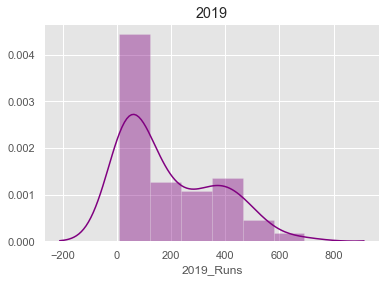

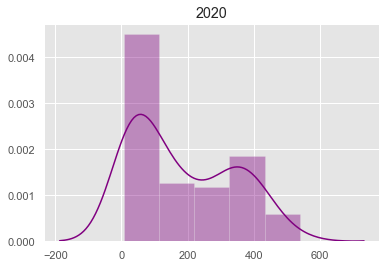

In [22]:
plt.title('2019')
sns.distplot(np.exp(df['2019_Runs']),color='purple')
plt.show()

sns.distplot(np.exp(prediction),color='purple')
plt.title('2020')
plt.show()

* Thus we can conclude that our model has performed well on the unseen data and there have been no inflated outputs from our model.

___
___